The MNIST dataset of handwritten digits is one of the earliest and most used datasets to benchmark machine learning classifiers. Each datapoint contains 784 input features – the pixel values from a 28×28 image – and belongs to one of 10 output classes – represented by the numbers 0-9.
1. Logistic regression
In this problem you will use numpy to classify input images using a logistic-regression. Use only Python standard library modules, numpy, and mathplotlib for this problem.

In [ ]:
# Importing the necessary libraries. 
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Extracting the data from the file.
open_file = 'mnist_traindata.hdf5'
with h5py.File(open_file, 'r') as columns:
    file_datacols = np.array(columns)
    print(file_datacols)

['xdata' 'ydata']


In [ ]:
# Converting the data to an array.
open_file = 'mnist_traindata.hdf5' # Training dataset.
with h5py.File(open_file, 'r') as columns:
    xdata = np.float32(np.array(columns['xdata']))
    ydata = np.float32(np.array(columns['ydata']))
print('Dimensions of xdata: ', xdata.shape)
print('Dimensions of ydata: ', ydata.shape)

open_file = 'mnist_testdata.hdf5' # Testing dataset.
with h5py.File(open_file, 'r') as columns:
    xdatatest = np.float32(np.array(columns['xdata']))
    ydatatest = np.float32(np.array(columns['ydata']))

print("The dimensions of xdataset: ", xdatatest.shape)

Dimensions of xdata:  (60000, 784)
Dimensions of ydata:  (60000, 10)
The dimensions of xdataset:  (10000, 784)


(a) Logistic “2” detector
In this part you will use the provided MNIST handwritten-digit data to build and train a logistic
“2” detector: y =  1 x is a "2" 0 else.

A logistic classifier takes learned weight vector w = [w1, w2, . . . wL]T and the unregularized offset bias b ≜ w0 to estimate a probability that an input vector x = [x1, x2, . . . , xL]T is “2”:
p(x) = P [Y = 1|x, w] = 1 1 + exp PL i=1 wk · xk + w0 = 1 1 + exp (wT x + w0).

Train a logistic classifier to find weights that minimize the binary log-loss (also called the binary cross entropy loss): l(w) = −1NXN i=1 (yilog p(x)) + (1 − yi) log (1 − p(x)) where the sum is over the N samples in the training set. Train your model until convergence accuracyording to some metric you choose. Experiment with variations of l1- and/or l2-regularization to stabilize training and improve generalization.

In [ ]:
# Training the model.
# x -> xdata; y -> ydata; w -> weight; b -> bias.
def train_model(x, y, w, b):
    samples, dataset = x.shape
    weights = []
    bias = []
    loss_list = []
    accuracy = []

    for i in range(samples):
        xi = x[i]
        yi = y[i, 2]
        s = np.matmul(w.T, xi) + b # Power of the exponent.
        act = 1 / (1 + math.exp(-s))
        loss = yi * np.log(act) + (1 - yi) * np.log(1 - act)
        loss_list.append(loss)
        weight_values = (yi - act) * xi
        weights.append(weight_values)
        bias_values = (yi - act)
        bias.append(bias_values)

        if act >= 0.5: # Threshold condition/benchmark for the accuracy.
            if yi == 1:
                accuracy.append(1)
        else:
            if yi == 0:
                accuracy.append(1)
    
    loss_sum = -1 * np.sum(loss_list) / samples # Calculating the loss.
    weight_sum = np.array(-1 * np.sum(weights, axis = 0) / samples)
    bias_sum = -1 * np.sum(bias) / samples
    total_accuracy = np.sum(accuracy) / samples * 100 # Computing the accuracy.
    
    return weight_sum, bias_sum, total_accuracy, loss_sum

# Testing the model.
# x -> xdata; y -> ydata; w -> weight; b -> bias.
def test_model(x, y, w, b):
    samples, dataset = x.shape
    accuracy = []
    loss_list = []

    for i in range(samples):
        xi = x[i]
        yi = y[i, 2]
        s = np.matmul(w.T, xi) + b # Power of the exponent.
        act = 1 / (1 + math.exp(-s))
        
        if act >= 0.5: # Threshold condition/benchmark for the accuracy.
            if yi == 1:
                accuracy.append(1)
        elif yi == 0:
                accuracy.append(1)
        loss = yi * np.log(act) + (1 - yi) * np.log(1 - act)
        loss_list.append(loss)
    
    loss_sum = -1 * np.sum(loss_list) / samples # Computing the loss.
    total_accuracy = np.sum(accuracy) / samples * 100 # Calculating the accuracy.
    
    return total_accuracy, loss_sum

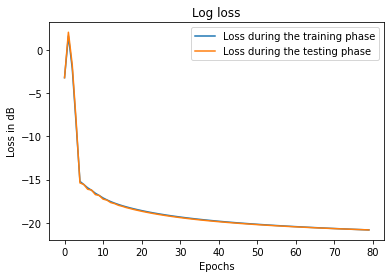

In [ ]:
w = np.zeros([784]) # Resetting the weight values before the fucntion call.
b = 0 # Resetting the bias values before the fucntion call.
train_loss_array = []
test_loss_array = []
accuracy_array = []
final_accuracy_array = []
epoch = 80

for i in range(epoch):
    weight_sum, bias_sum, accuracy, loss_sum = train_model(xdata, ydata, w, b) # Function (train) call.
    accuracy_array.append(accuracy)
    train_loss_array.append(loss_sum)
    
    accuracy_test, loss_sum_total = test_model(xdatatest, ydatatest, w, b) # Function (test) call.
    final_accuracy_array.append(accuracy_test)
    test_loss_array.append(loss_sum_total)
    
    w -= 0.85 * weight_sum # Learning rate is 0.85
    b -= 0.85 * bias_sum

# Plotting the log loss graph.
plt.title("Log loss")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(epoch), 20 * np.log10(train_loss_array), label = "Loss during the training phase")
plt.plot(range(epoch), 20 * np.log10(test_loss_array), label = "Loss during the testing phase")
plt.legend()
plt.show()

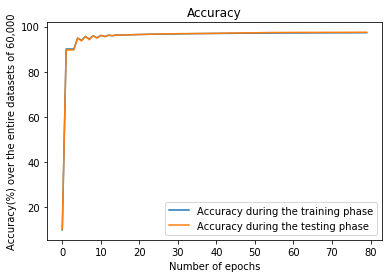

In [ ]:
# Plotting the accuracy graph.
plt.title("Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy(%) over the entire datasets of 60,000")
plt.plot(range(epoch), accuracy_array, label = "Accuracy during the training phase")
plt.plot(range(epoch), final_accuracy_array, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

iv. Plot log-loss (i.e., learning curve) of the training set and test set on the same figure. On
a separate figure plot the accuracy against iteration number of your model on the training
set and test set. Plot each as a function of the iteration number.

In [ ]:
print("Final training loss: ", 20 * np.log10(train_loss_array[epoch - 1]), 'dB')
print("Final test loss: ", 20 * np.log10(test_loss_array[epoch - 1]), 'dB')
print("Final training accuracy: ", accuracy_array[epoch - 1], '%')
print("Final test accuracy: ", final_accuracy_array[epoch - 1], '%')

Final training loss:  -20.837246335004895 dB
Final test loss:  -20.83727741914357 dB
Final training accuracy:  97.3 %
Final test accuracy:  97.5 %


v. Clasify each input to the binary output “digit is a 2” using a 0.5 threshold. Compute
the final loss and final accuracy for both your training set and test set.

Submit your trained weights to Autolab. Save your weights and bias to an hdf5 file. Use keys w
and b for the weights and bias, respectively. w should be a length-784 numpy vector/array and
b should be a numpy scalar.

In [ ]:
print_file = 'outFile.hdf5'
with h5py.File(print_file, 'w') as hf:
    hf.create_dataset('w', data = np.asarray(w)) # Writing the weights in the file.
    hf.create_dataset('b', data = np.float32(b)) # Writing the bias in the file.

i. How did you determine a learning rate? What values did you try? What was your final value?

**Answer: -** I tried the following learning rates- 0.01, 0.05, 0.1, 0.3, 0.5, 0.6, 0.65, 0.7, 0.8, 0.85 and 0.9. I observed that a higher learning rate resulted in a better accuracy as the amount of data required to update the weights (happens at the end of each epoch) are large in volume. Finally, I choose 0.85 as the optimal learning rate.

ii. Describe the method you used to establish model convergence.

**Answer: -** I used the equations (as is) which were given in the question. I calculated the loss of each epoch and appended it to a list. Moreover, I used the treshold condition of 0.5 in my code for the accuracy.  

iii. What regularizers did you try? Specifically, how did each impact your model or improve its performance?

**Answer: -** I used the following regularizer values- 0.01, 0.5, 0.6, 0.8, 0.9, 0.95 and 0.98. Interestingly, all of the above values resulted in the model's accuracy to decrease and the loss to increase. So, I ended up not using a regularizer.  
